In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import re
import os
import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline

In [2]:
# pulling the data of the three stocks of toyota, GM and Tesla for December of 2021


toyota_csv= Path("Toyota_stock.csv")
general_motors_csv = Path("GM_stock.csv")
tesla_csv = Path("Tesla_stock.csv")
tx60_csv = Path('TX60_stock.csv')

toyota_df = pd.read_csv(toyota_csv)
general_df = pd.read_csv(general_motors_csv)
tesla_df = pd.read_csv(tesla_csv)
tx60_df= pd.read_csv(tx60_csv)


In [3]:
#we will set the index for all three stocks
toyota_df.set_index(pd.to_datetime(toyota_df['Date'], infer_datetime_format=True), inplace=True)
toyota_df = toyota_df.drop(columns=['Date'], axis=1)

general_df.set_index(pd.to_datetime(general_df['Date'], infer_datetime_format=True), inplace=True)
general_df = general_df.drop(columns=['Date'], axis=1)
tesla_df.set_index(pd.to_datetime(tesla_df['Date'], infer_datetime_format=True), inplace=True)
tesla_df = tesla_df.drop(columns=['Date'], axis=1)
tx60_df.set_index(pd.to_datetime(tx60_df['Date'], infer_datetime_format=True), inplace=True)
tx60_df = tx60_df.drop(columns=['Date'], axis=1)

In [4]:
# we will calculate the dailey returns 

toyota_dr = toyota_df.pct_change()
general_dr = general_df.pct_change()
tesla_dr = tesla_df.pct_change()
tx60_dr = tx60_df.pct_change()



In [5]:
# we will concat the data of each portfolio before we go further 

portfolio_df = pd.concat([toyota_dr,general_dr,tesla_dr,tx60_dr], axis="columns", join="inner")

portfolio_df.columns = ['Toyota', 'General Motors','Tesla', 'S&P 60']

portfolio_df.head()


,Toyota,General Motors,Tesla,S&P 60
Date,,,,
2021-12-01 16:00:00,NaN,NaN,NaN,NaN
2021-12-02 16:00:00,0.027315,0.050982,-0.009498,0.014911
2021-12-03 16:00:00,-0.003822,-0.021468,-0.064199,-0.004937
2021-12-06 16:00:00,0.011674,0.002177,-0.005872,0.010163
2021-12-07 16:00:00,0.015440,0.028242,0.042358,0.013517


In [6]:
# we will calculate the weight of the stocks

weights = [0.15, 0.2, 0.50, 0.25] 
portfolio_return = portfolio_df.dot(weights)
portfolio_return.head()


Date
2021-12-01 16:00:00         NaN
2021-12-02 16:00:00    0.013273
2021-12-03 16:00:00   -0.038201
2021-12-06 16:00:00    0.001791
2021-12-07 16:00:00    0.032523
dtype: float64

In [7]:
# we will calculate the annualized std

annualized_std = portfolio_df * np.sqrt(252)
annualized_std.head()

,Toyota,General Motors,Tesla,S&P 60
Date,,,,
2021-12-01 16:00:00,NaN,NaN,NaN,NaN
2021-12-02 16:00:00,0.433613,0.809310,-0.150772,0.236709
2021-12-03 16:00:00,-0.060669,-0.340800,-1.019124,-0.078375
2021-12-06 16:00:00,0.185316,0.034562,-0.093217,0.161332
2021-12-07 16:00:00,0.245096,0.448328,0.672418,0.214578


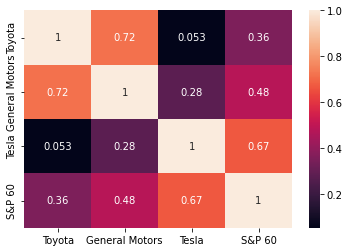

In [8]:
# calculate correlation 
correlation = portfolio_df.corr()

sns.heatmap(correlation, annot=True)
plt.show()

<AxesSubplot:xlabel='Date'>

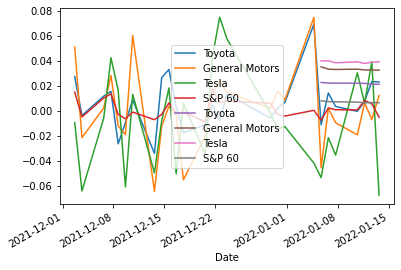

In [9]:
# calculate rolling std with 21 day window

ax = portfolio_df.plot()

portfolio_df.rolling(window=21).std().plot(ax=ax)

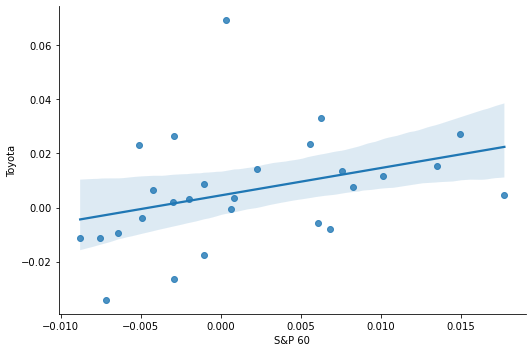

In [10]:
# calculate the beta for your portfolio 

covarience1 = portfolio_df['Toyota'].cov(portfolio_df['S&P 60'])

varience1 = portfolio_df['S&P 60'].var()

beta1 = covarience1/varience1

beta1

sns.lmplot(x='S&P 60', y= 'Toyota', data=portfolio_df, aspect=1.5, fit_reg=True)

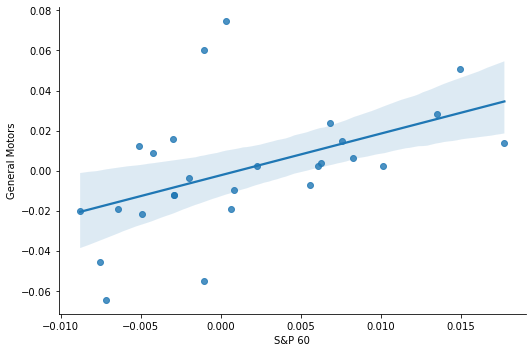

In [11]:
covarience2 = portfolio_df['General Motors'].cov(portfolio_df['S&P 60'])



beta2 = covarience2/varience1

beta2

sns.lmplot(x='S&P 60', y= 'General Motors', data=portfolio_df, aspect=1.5, fit_reg=True)

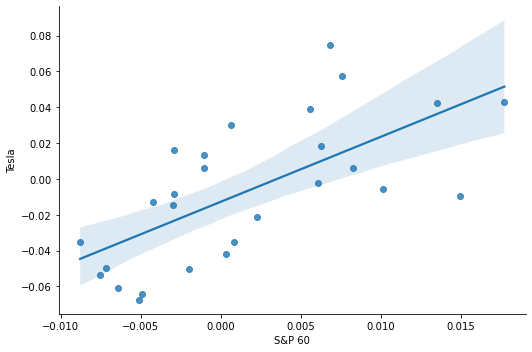

In [12]:
covarience3 = portfolio_df['Tesla'].cov(portfolio_df['S&P 60'])



beta3 = covarience3/varience1

beta3

sns.lmplot(x='S&P 60', y= 'Tesla', data=portfolio_df, aspect=1.5, fit_reg=True)

In [13]:
# calculate the sharp ratio

sharpe_ratios = (portfolio_df.mean() * 252) / (portfolio_df.std() * np.sqrt(252))

sharpe_ratios


Toyota            4.728522
General Motors    0.539369
Tesla            -2.777957
S&P 60            3.561933
dtype: float64